# Imports

In [125]:
import main
import matplotlib.pyplot as plt
from pandas import DataFrame
from enum import IntEnum

# Packaging and Training
Package vans for a few "days" and stop only when we think we have learned the best way to do so. Store information about every time we packaged the vans in `training_iterations`.

Note that learning can take several minutes, but since its progress is saved in a file locally it won't have to learn it all again.

In [126]:
N_PACKAGES = 10_000

training_iterations: list[dict] = []

done_learning = False

while not done_learning:
    training_iteration = main.package_vans(N_PACKAGES)
    training_iterations.append(training_iteration)
    done_learning = training_iteration["done_learning"]

print("Done learning!")

Done learning!


# Data
Get the data from the last iteration of training.

In [127]:
last_iteration = training_iterations[-1]
df = last_iteration["df"]
df

,Paket_id,Vikt,Förtjänst,Deadline,Delivered
6994,3113876337,1.1,9,3,0
5262,3113874605,1.1,8,2,0
5263,3113874606,1.0,7,2,0
9832,3113879175,1.1,7,2,0
9168,3113878511,1.6,10,2,0
...,...,...,...,...,...
911,3113870254,9.1,3,-2,-1
6676,3113876019,8.2,2,-2,-1
2437,3113871780,10.8,2,-2,-1
6566,3113875909,6.5,1,-2,-1


# Get Packages Function
Create a function for retrieving the packages of a selected van, or to retrieve the packages left in the warehouse.

In [128]:
class VanNumber(IntEnum):
    NOT_DELIVERED = -1
    ONE = 0
    TWO = 1
    THREE = 2
    FOUR = 3
    FIVE = 4
    SIX = 5
    SEVEN = 6
    EIGHT = 7
    NINE = 8
    TEN = 9

def get_packages(van_number: VanNumber) -> DataFrame:
    return df[ (df["Delivered"] == van_number) ]

# Plot
Plot stuff for each van + the packages still left.

In [159]:
def plot_packages(packages: DataFrame) -> None:
    # Columns of interest
    columns = ["Vikt", "Förtjänst"]
    
    for column in columns:
        mean_value = packages[column].mean()
        variance = packages[column].var()
        std_dev = packages[column].std()

        print(f"\nStatistics for '{column}':")
        print(f"  Mean: {mean_value:.2f}")
        print(f"  Variance: {variance:.2f}")
        print(f"  Standard Deviation: {std_dev:.2f}")

        plt.figure(figsize=(5, 3))
        plt.hist(packages[column], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f"Histogram of '{column}'")
        plt.xlabel(column)
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f"Mean = {mean_value:.2f}")
        plt.legend()

    plt.show()

    print("-----------------------------------------------------------------------")

- VAN  1  -

Statistics for 'Vikt':
  Mean: 2.16
  Variance: 0.34
  Standard Deviation: 0.58

Statistics for 'Förtjänst':
  Mean: 7.18
  Variance: 2.18
  Standard Deviation: 1.48


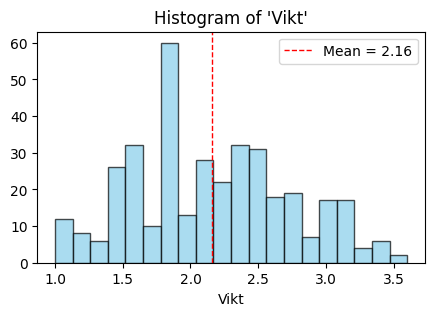

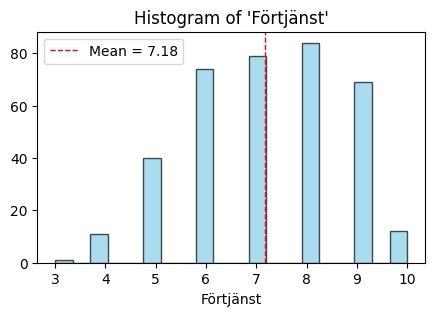

-----------------------------------------------------------------------
- VAN  2  -

Statistics for 'Vikt':
  Mean: 2.95
  Variance: 0.59
  Standard Deviation: 0.77

Statistics for 'Förtjänst':
  Mean: 6.84
  Variance: 2.76
  Standard Deviation: 1.66


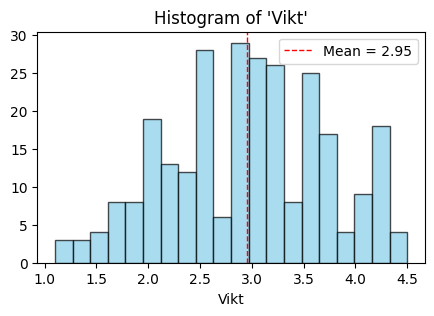

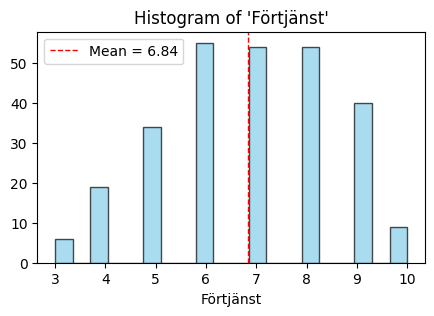

-----------------------------------------------------------------------
- VAN  3  -

Statistics for 'Vikt':
  Mean: 3.45
  Variance: 0.66
  Standard Deviation: 0.81

Statistics for 'Förtjänst':
  Mean: 6.90
  Variance: 2.55
  Standard Deviation: 1.60


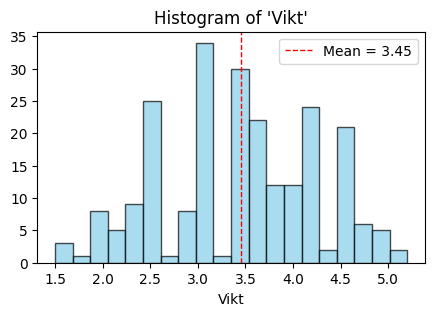

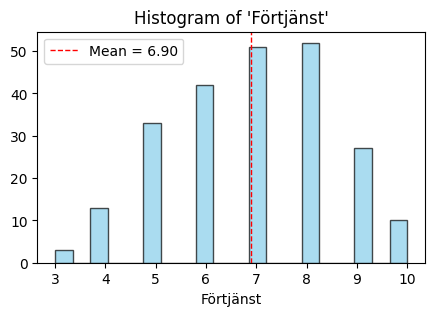

-----------------------------------------------------------------------
- VAN  4  -

Statistics for 'Vikt':
  Mean: 3.80
  Variance: 0.72
  Standard Deviation: 0.85

Statistics for 'Förtjänst':
  Mean: 6.90
  Variance: 2.26
  Standard Deviation: 1.50


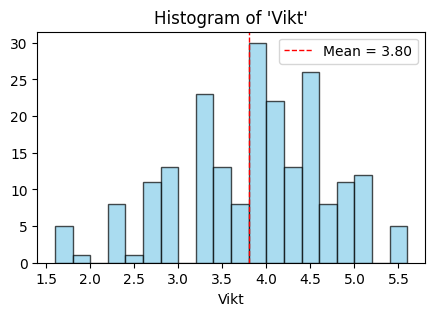

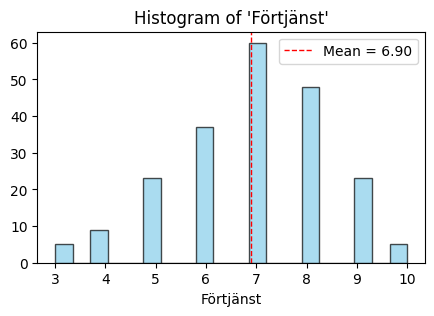

-----------------------------------------------------------------------
- VAN  5  -

Statistics for 'Vikt':
  Mean: 3.90
  Variance: 1.20
  Standard Deviation: 1.09

Statistics for 'Förtjänst':
  Mean: 6.65
  Variance: 3.28
  Standard Deviation: 1.81


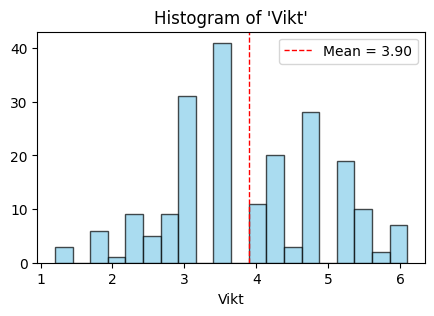

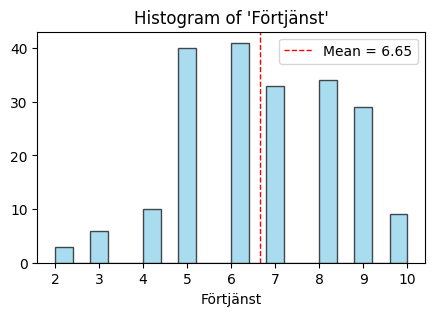

-----------------------------------------------------------------------
- VAN  6  -

Statistics for 'Vikt':
  Mean: 4.14
  Variance: 1.04
  Standard Deviation: 1.02

Statistics for 'Förtjänst':
  Mean: 6.63
  Variance: 2.56
  Standard Deviation: 1.60


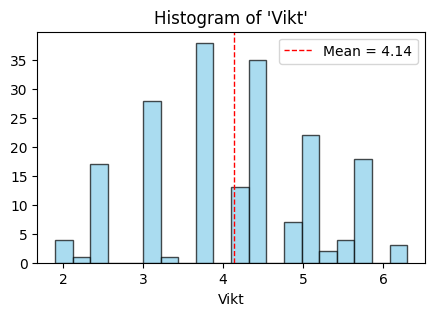

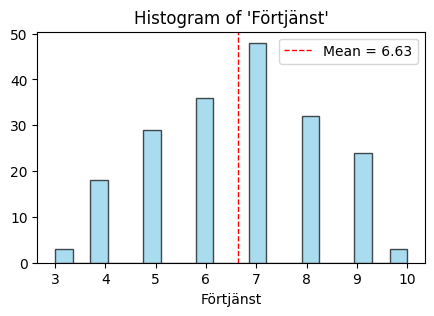

-----------------------------------------------------------------------
- VAN  7  -

Statistics for 'Vikt':
  Mean: 4.33
  Variance: 0.98
  Standard Deviation: 0.99

Statistics for 'Förtjänst':
  Mean: 6.60
  Variance: 2.34
  Standard Deviation: 1.53


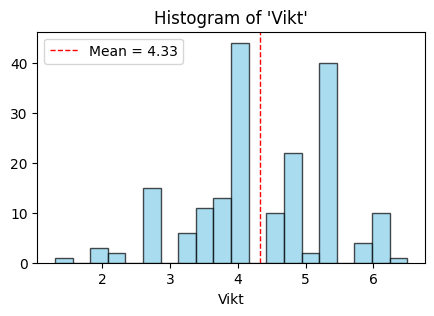

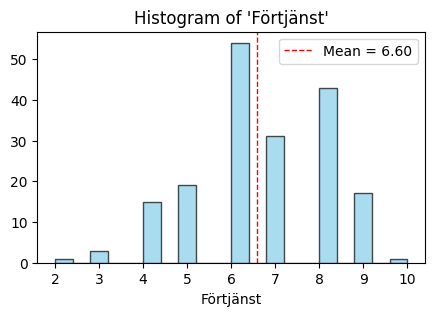

-----------------------------------------------------------------------
- VAN  8  -

Statistics for 'Vikt':
  Mean: 4.60
  Variance: 1.26
  Standard Deviation: 1.12

Statistics for 'Förtjänst':
  Mean: 6.72
  Variance: 2.48
  Standard Deviation: 1.57


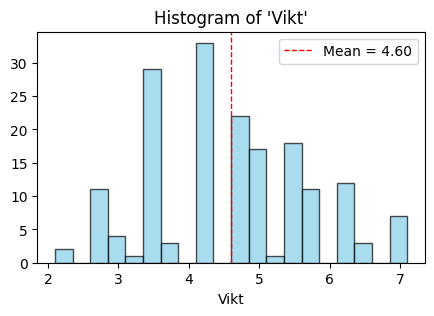

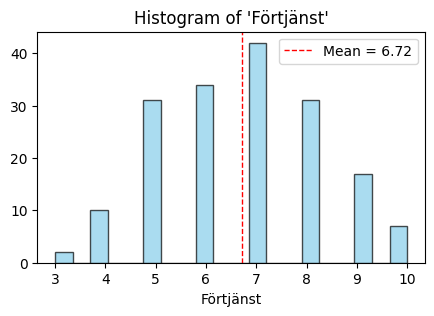

-----------------------------------------------------------------------
- VAN  9  -

Statistics for 'Vikt':
  Mean: 4.82
  Variance: 1.47
  Standard Deviation: 1.21

Statistics for 'Förtjänst':
  Mean: 6.64
  Variance: 2.76
  Standard Deviation: 1.66


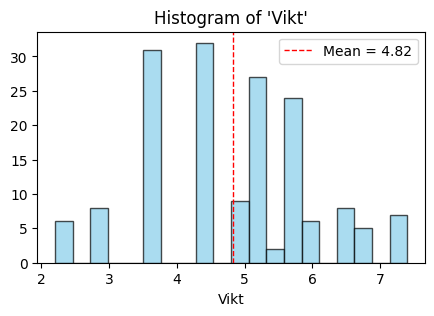

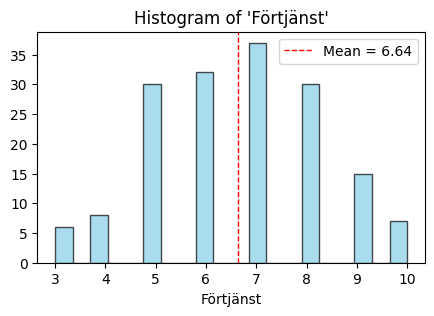

-----------------------------------------------------------------------
- VAN  10  -

Statistics for 'Vikt':
  Mean: 4.89
  Variance: 1.53
  Standard Deviation: 1.24

Statistics for 'Förtjänst':
  Mean: 6.51
  Variance: 2.66
  Standard Deviation: 1.63


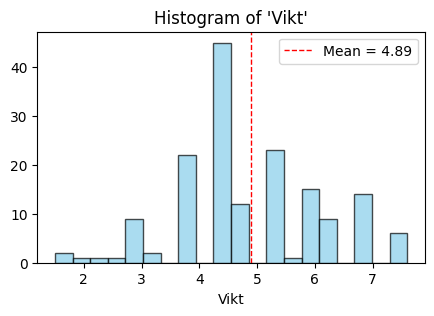

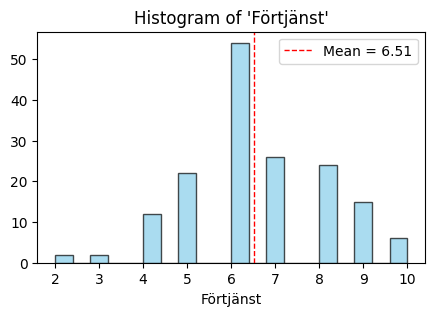

-----------------------------------------------------------------------


In [160]:
for van_number in VanNumber:
    if van_number > VanNumber.NOT_DELIVERED:
        print("- VAN ",van_number+1, " -")
        plot_packages( get_packages(van_number) )

Plot undelivered packages lastly:

Undelivered packages: 

Statistics for 'Vikt':
  Mean: 7.00
  Variance: 3.80
  Standard Deviation: 1.95

Statistics for 'Förtjänst':
  Mean: 4.86
  Variance: 3.86
  Standard Deviation: 1.97


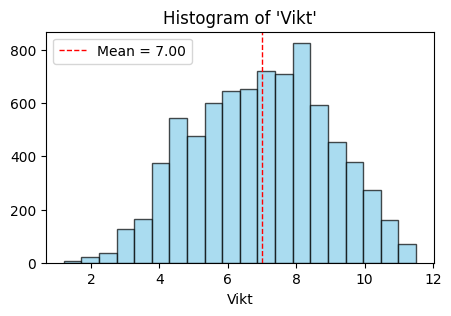

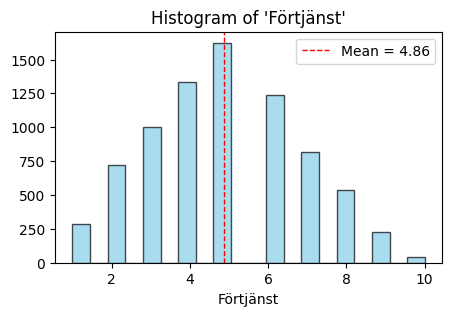

-----------------------------------------------------------------------


In [161]:
print("Undelivered packages: ")
plot_packages( get_packages(VanNumber.NOT_DELIVERED) )